## Tugas Exploratory Data Analysis (EDA)

In [1]:
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
#Baca dataset
df = pd.read_csv('bank_churn.csv')

In [3]:
#menampilkan 10 data teratas dari dataset churn
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


### General Information on the dataset

In [4]:
#Melihat jumlah record data dan atribut yang ada pada dataset (total row, total column)
df.shape

(10000, 14)

Pada data terdapat 10.000 customer dan 14 fitur

In [5]:
#Untuk melihat jumlah record per kelas
df['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

Dataset bank churn memiliki permasalahan ketidakseimbangan kelass dalam variabel target ("Churn"). Informasi yang didapatkan secara umum bahwa lebih banyak customer yang non churn dari pada churn, sehingga prediksi akan lebih condong ke dalam non churn.

In [6]:
#Mencari missing value pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
#mengecek tipe data pada setiap fitur
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

Tipe data pada semua fitur sudah sesuai

In [8]:
#Deskripsi pada dataset
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


### Pre-processing Data

In [9]:
#Mengecek apakah pada dataset terdapat missing value
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [10]:
#menghapus fitur yang tidak relevan untuk proses pembelajaran, seperti RowNumber, CustomerId dan Surname
df_new = df.drop(columns=["RowNumber", "CustomerId", "Surname"])

In [11]:
df_new.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Analisis

In [12]:
df[['Geography','Gender','Exited']].groupby(['Geography','Gender']).agg(['mean','count'])

Exited      
                      mean count
Geography Gender                
France    Female  0.203450  2261
          Male    0.127134  2753
Germany   Female  0.375524  1193
          Male    0.278116  1316
Spain     Female  0.212121  1089
          Male    0.131124  1388

Informasi yang didapatkan meliputi:
* Secara umum, Female lebih cenderung menjadi customer Churn daripada Male
* Tingkat customer Churn di Negara Jerman lebih tinggi daripada di Prancis dan Spanyol

#### Distribusi Variable

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

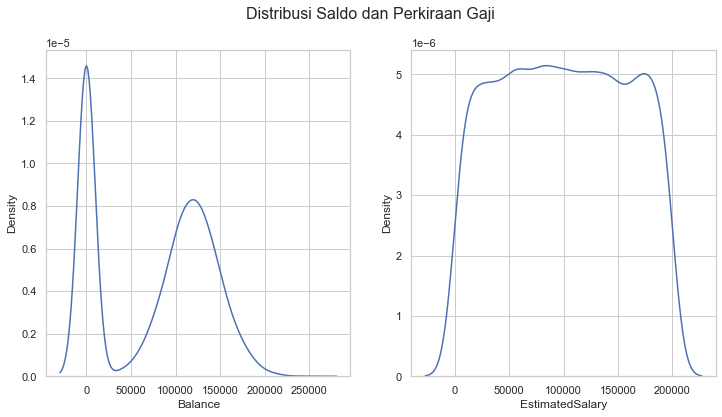

In [13]:
fig, axes = plt.subplots(ncols=2, figsize=(12,6))

fig.suptitle("Distribusi Saldo dan Perkiraan Gaji", fontsize=16)

sns.distplot(df.Balance, hist=False, ax=axes[0])
sns.distplot(df.EstimatedSalary, hist=False, ax=axes[1])

Informasi yang didapat:
* Sebagian besar pelanggan memiliki saldo nol, selain itu pada fitur Saldo memiliki distribusi normal
* EstimatedSalary berdistribusi normal

In [14]:
df['Balance_binary'] = df['Balance'].where(df['Balance'] == 0, 1)

In [15]:
df['Balance_binary'].value_counts()

1.0    6383
0.0    3617
Name: Balance_binary, dtype: int64

Terdapat sekitar sepertiga dari pelanggan memiliki saldo nol

In [16]:
df[['Balance_binary','Exited']].groupby('Balance_binary').mean()

,Exited
Balance_binary,
0.0,0.138236
1.0,0.240796


Insigt: Pelanggan dengan saldo nol cenderung tidak melakukan churn

#### Korelasi antar Variabel

<AxesSubplot:>

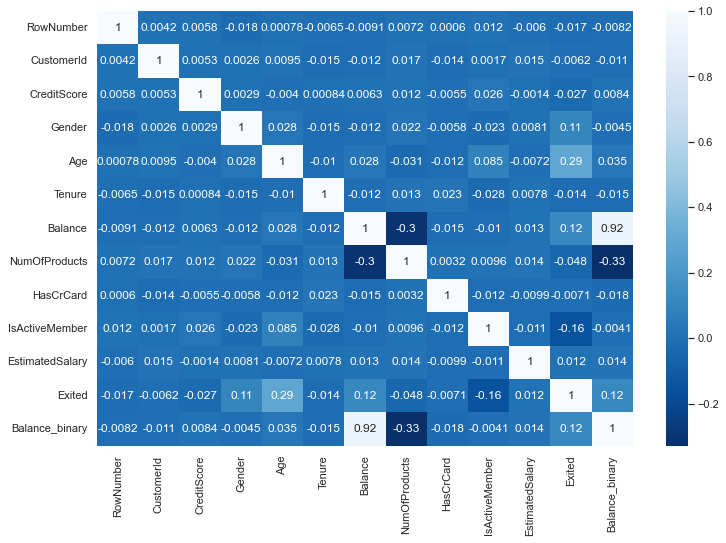

In [17]:
df['Gender'].replace({'Male':0, 'Female':1}, inplace=True)
corr = df.corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, cmap='Blues_r', annot=True)

Temuan:
Kolom “Age”, “Gender”, dan “Balance” berkorelasi positif dengan churn pelanggan (“Churn”). Ada korelasi negatif antara menjadi anggota aktif (“IsActiveMember”) dan churn pelanggan.

Karena "Usia" ternyata memiliki nilai korelasi tertinggi, mari kita gali lebih dalam.

In [18]:
df[['Exited', 'Age']].groupby('Exited').mean()

,Age
Exited,
0,37.408389
1,44.837997


Insight: Usia rata-rata pelanggan yang berhenti lebih tinggi. 

<AxesSubplot:title={'center':'Boxplot Kolom Usia'}, ylabel='Age'>

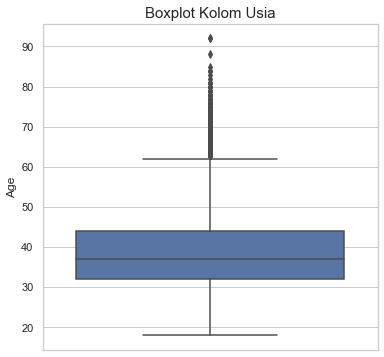

In [19]:
plt.figure(figsize=(6,6))
plt.title("Boxplot Kolom Usia", fontsize=15)
sns.boxplot(y=df['Age'])

Titik-titik di atas garis atas menunjukkan outlier. Dengan demikian, ada banyak outlier di sisi atas

## Univariate Analysis

In [20]:
df['Exited'].unique()

array([1, 0], dtype=int64)

In [21]:
customer_churn = df_new.loc[df['Exited'] == 1]
customer_nonchurn = df_new.loc[df['Exited'] == 0]

In [22]:
customer_churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1


In [23]:
customer_nonchurn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


In [24]:
df_new.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

## Nilai outlier

<AxesSubplot:xlabel='CreditScore'>

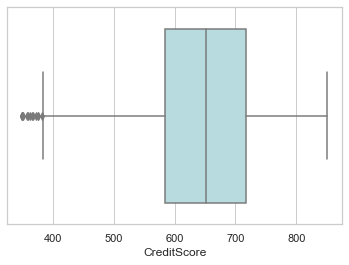

In [25]:
sns.boxplot(x = df['CreditScore'], color='powderblue')

<AxesSubplot:xlabel='CreditScore', ylabel='Density'>

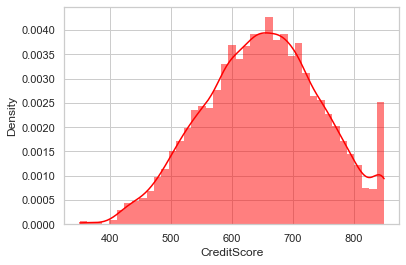

In [26]:
sns.histplot(data = df['CreditScore'], color="red", kde=True, stat="density", linewidth=0)

In [27]:
df_new.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [28]:
df_new.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

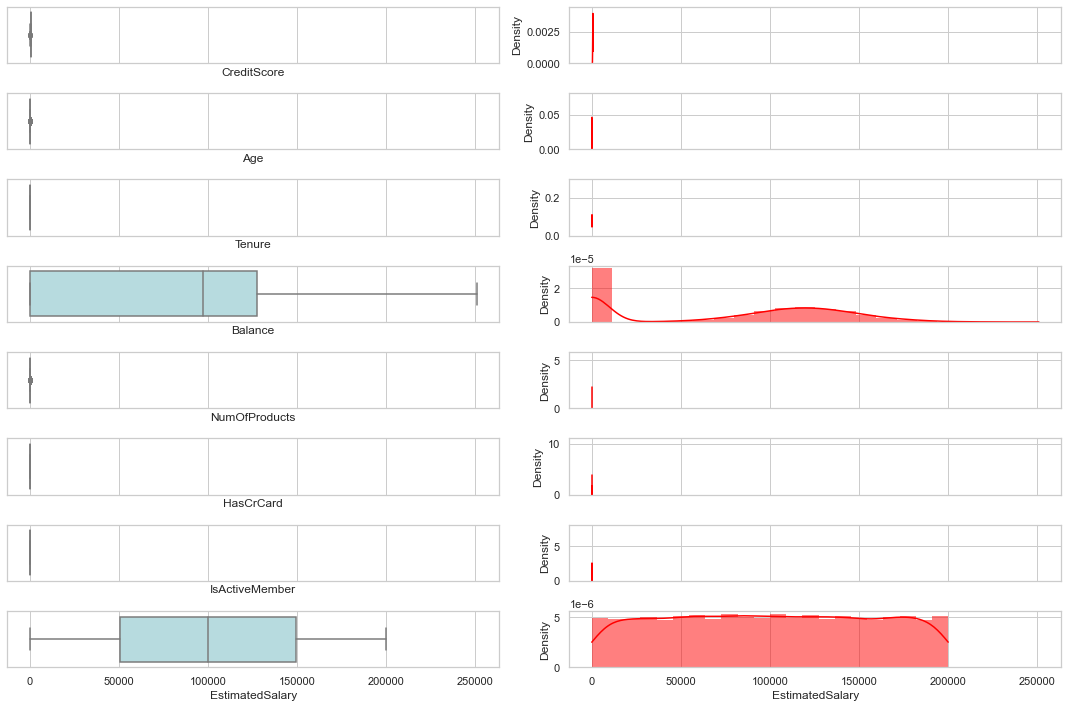

In [29]:
#Setting up subplots
fig, axes=plt.subplots(ncols=2, nrows=8, figsize=(15,10), sharex=True)

column=[ 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
for i in range(8):
    
    #Ploting the boxplot
    sns.boxplot(x = df[column[i]], ax=axes[i][0], color='powderblue')
    
    #Ploting the KDE
    sns.histplot(data=df[column[i]], ax=axes[i][1],  color="red", kde=True, stat="density", linewidth=0)  
    
    plt.tight_layout()

<AxesSubplot:xlabel='Exited', ylabel='count'>

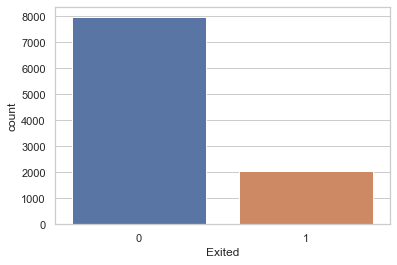

In [30]:
#Mencari jumlah record perkelas
sns.countplot(x=df['Exited'])

Dari grafik menunjukan bahwa pada dataset Bank Churn terdapat permasalahan ketidakseimbangan kelas

## Bivariate Data Analysis

* CreditScore vs Exited
* Geography vs Exited
* Gender vs Exited
* Age vs Exited

### CreditScore vs Exited (Numeric)

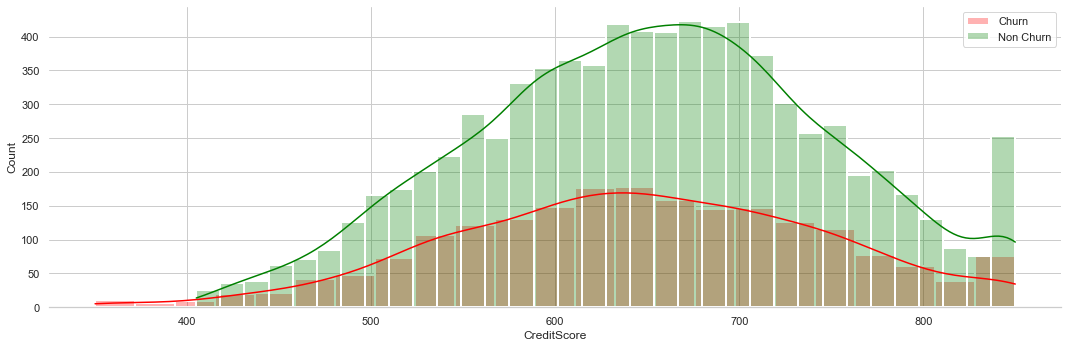

In [31]:
fig, axes = plt.subplots(ncols = 1, figsize=(15, 5), sharex=True)
sns.despine(left=True) 

sns.histplot(data=customer_churn["CreditScore"],label= "Churn", color="red", kde=True,linewidth=2, alpha=0.3)
sns.histplot(data=customer_nonchurn["CreditScore"],label= "Non Churn", color='green', kde=True, linewidth=2, alpha=0.3)

plt.legend()
plt.tight_layout()

Kelas Customer churn dan non churn rata-rata memiliki CreditScore sebesar 400 - 830. Terjadi overlapping antara kelas  churn dan non churn karena memiliki rata-rata yang hampir sama.

### Geography vc Exited (Nominal)

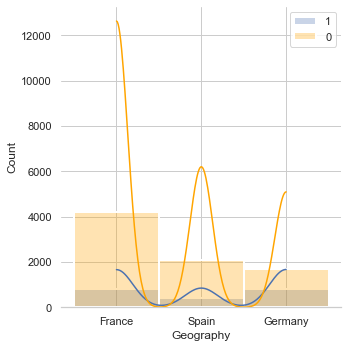

In [32]:
fig, axes = plt.subplots(ncols = 1, figsize=(5, 5), sharex=True)
sns.despine(left=True)

sns.histplot(data=customer_churn["Geography"],label= 1,color='b',kde=True,linewidth=2,alpha=0.3)
sns.histplot(data=customer_nonchurn["Geography"],label= 0,kde=True,color='orange',linewidth=2,alpha=0.3)

plt.legend()
plt.tight_layout()

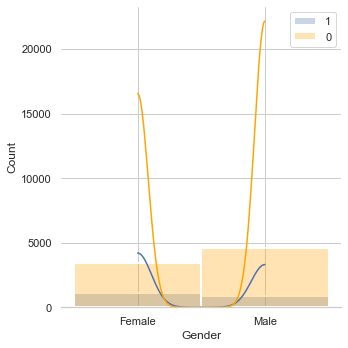

In [33]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols = 1,figsize=(5, 5), sharex=True)
sns.despine(left=True)  #sepal_length-vs-class

# Ploting the histogram with KDE

sns.histplot(data=customer_churn["Gender"],label= 1,color='b',kde=True,linewidth=2,alpha=0.3)
sns.histplot(data=customer_nonchurn["Gender"],label= 0,kde=True,color='orange',linewidth=2,alpha=0.3)

plt.legend()
plt.tight_layout()

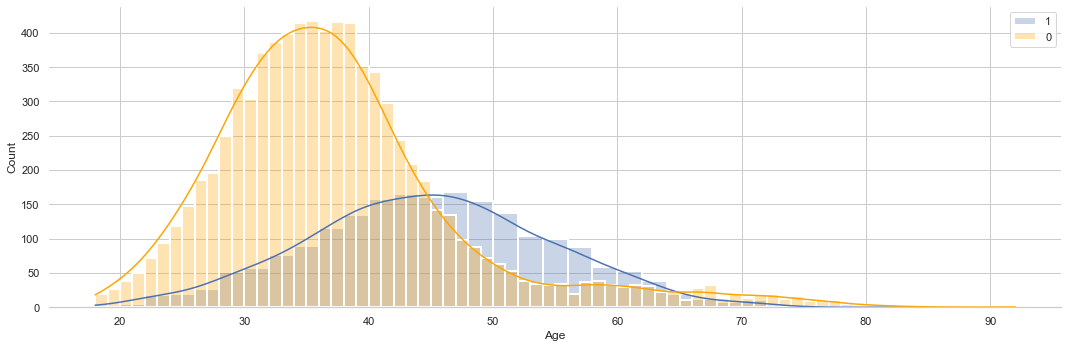

In [34]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols = 1,figsize=(15, 5), sharex=True)
sns.despine(left=True)  #sepal_length-vs-class

# Ploting the histogram with KDE

sns.histplot(data=customer_churn["Age"],label= 1,color='b',kde=True,linewidth=2,alpha=0.3)
sns.histplot(data=customer_nonchurn["Age"],label= 0,kde=True,color='orange',linewidth=2,alpha=0.3)

plt.legend()
plt.tight_layout()

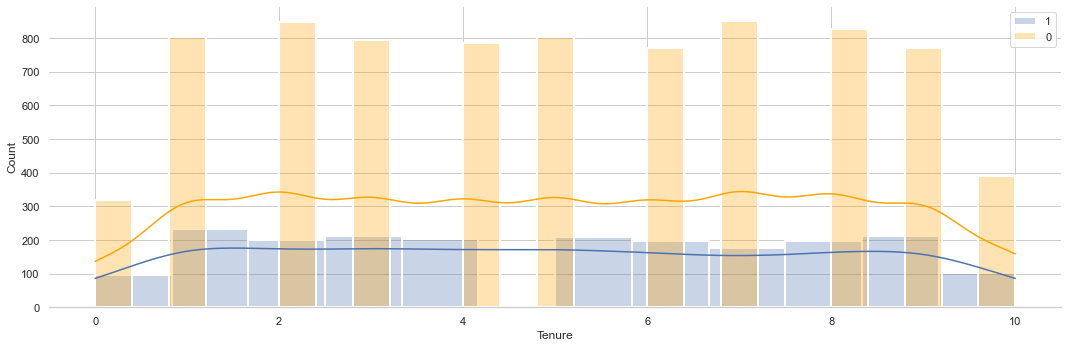

In [35]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols = 1,figsize=(15, 5), sharex=True)
sns.despine(left=True)  #sepal_length-vs-class

# Ploting the histogram with KDE

sns.histplot(data=customer_churn["Tenure"],label= 1,color='b',kde=True,linewidth=2,alpha=0.3)
sns.histplot(data=customer_nonchurn["Tenure"],label= 0,kde=True,color='orange',linewidth=2,alpha=0.3)

plt.legend()
plt.tight_layout()

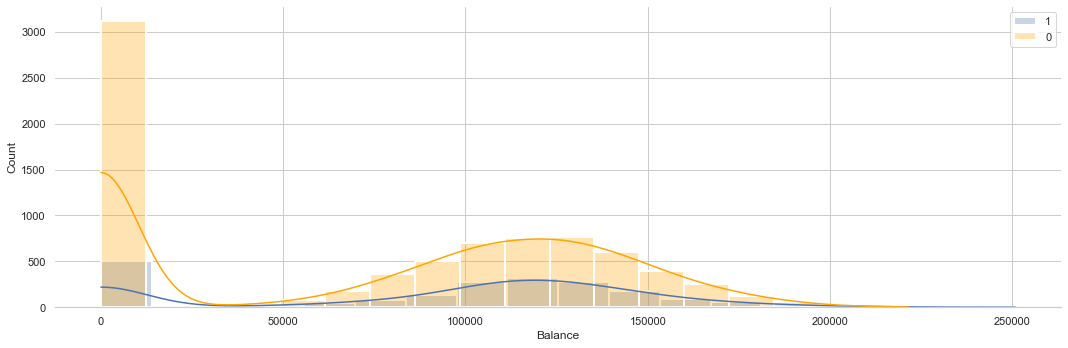

In [36]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols = 1,figsize=(15, 5), sharex=True)
sns.despine(left=True)  #sepal_length-vs-class

# Ploting the histogram with KDE

sns.histplot(data=customer_churn["Balance"],label= 1,color='b',kde=True,linewidth=2,alpha=0.3)
sns.histplot(data=customer_nonchurn["Balance"],label= 0,kde=True,color='orange',linewidth=2,alpha=0.3)

plt.legend()
plt.tight_layout()

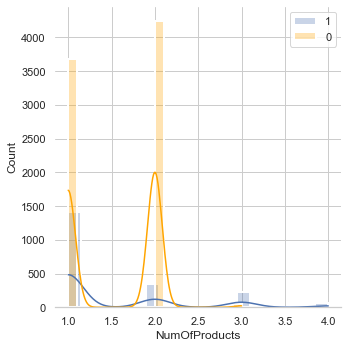

In [37]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols = 1,figsize=(5, 5), sharex=True)
sns.despine(left=True)  #sepal_length-vs-class

# Ploting the histogram with KDE

sns.histplot(data=customer_churn["NumOfProducts"],label= 1,color='b',kde=True,linewidth=2,alpha=0.3)
sns.histplot(data=customer_nonchurn["NumOfProducts"],label= 0,kde=True,color='orange',linewidth=2,alpha=0.3)

plt.legend()
plt.tight_layout()

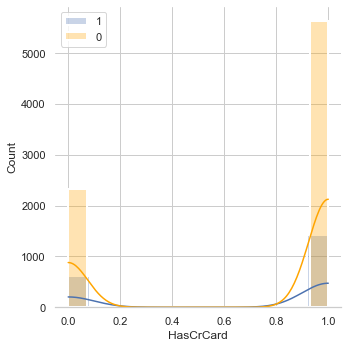

In [38]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols = 1,figsize=(5, 5), sharex=True)
sns.despine(left=True)  #sepal_length-vs-class

# Ploting the histogram with KDE

sns.histplot(data=customer_churn["HasCrCard"],label= 1,color='b',kde=True,linewidth=2,alpha=0.3)
sns.histplot(data=customer_nonchurn["HasCrCard"],label= 0,kde=True,color='orange',linewidth=2,alpha=0.3)

plt.legend()
plt.tight_layout()

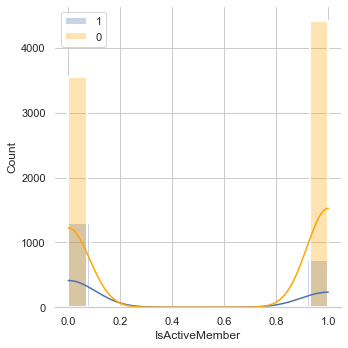

In [39]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols = 1,figsize=(5, 5), sharex=True)
sns.despine(left=True)  #sepal_length-vs-class

# Ploting the histogram with KDE

sns.histplot(data=customer_churn["IsActiveMember"],label= 1,color='b',kde=True,linewidth=2,alpha=0.3)
sns.histplot(data=customer_nonchurn["IsActiveMember"],label= 0,kde=True,color='orange',linewidth=2,alpha=0.3)

plt.legend()
plt.tight_layout()

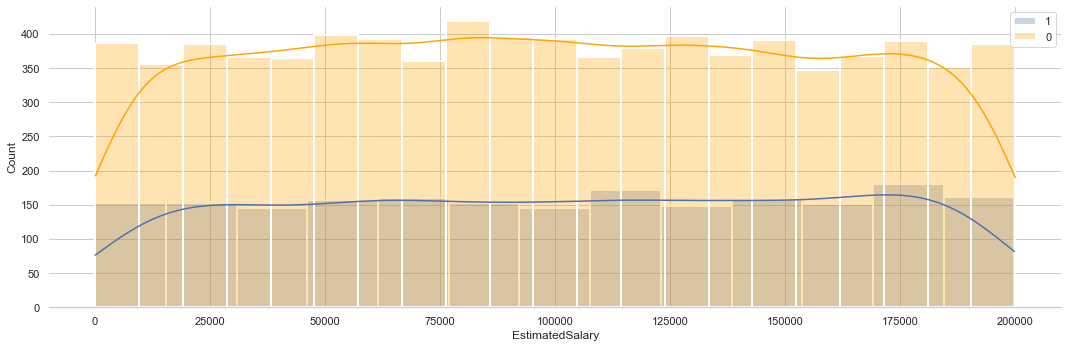

In [40]:
# Set up the matplotlib figure
f, axes = plt.subplots(ncols = 1,figsize=(15, 5), sharex=True)
sns.despine(left=True)  #sepal_length-vs-class

# Ploting the histogram with KDE

sns.histplot(data=customer_churn["EstimatedSalary"],label= 1,color='b',kde=True,linewidth=2,alpha=0.3)
sns.histplot(data=customer_nonchurn["EstimatedSalary"],label= 0,kde=True,color='orange',linewidth=2,alpha=0.3)

plt.legend()
plt.tight_layout()

In [41]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Balance_binary'],
      dtype='object')

## Multivariate Analysis

#### All species vs All Species

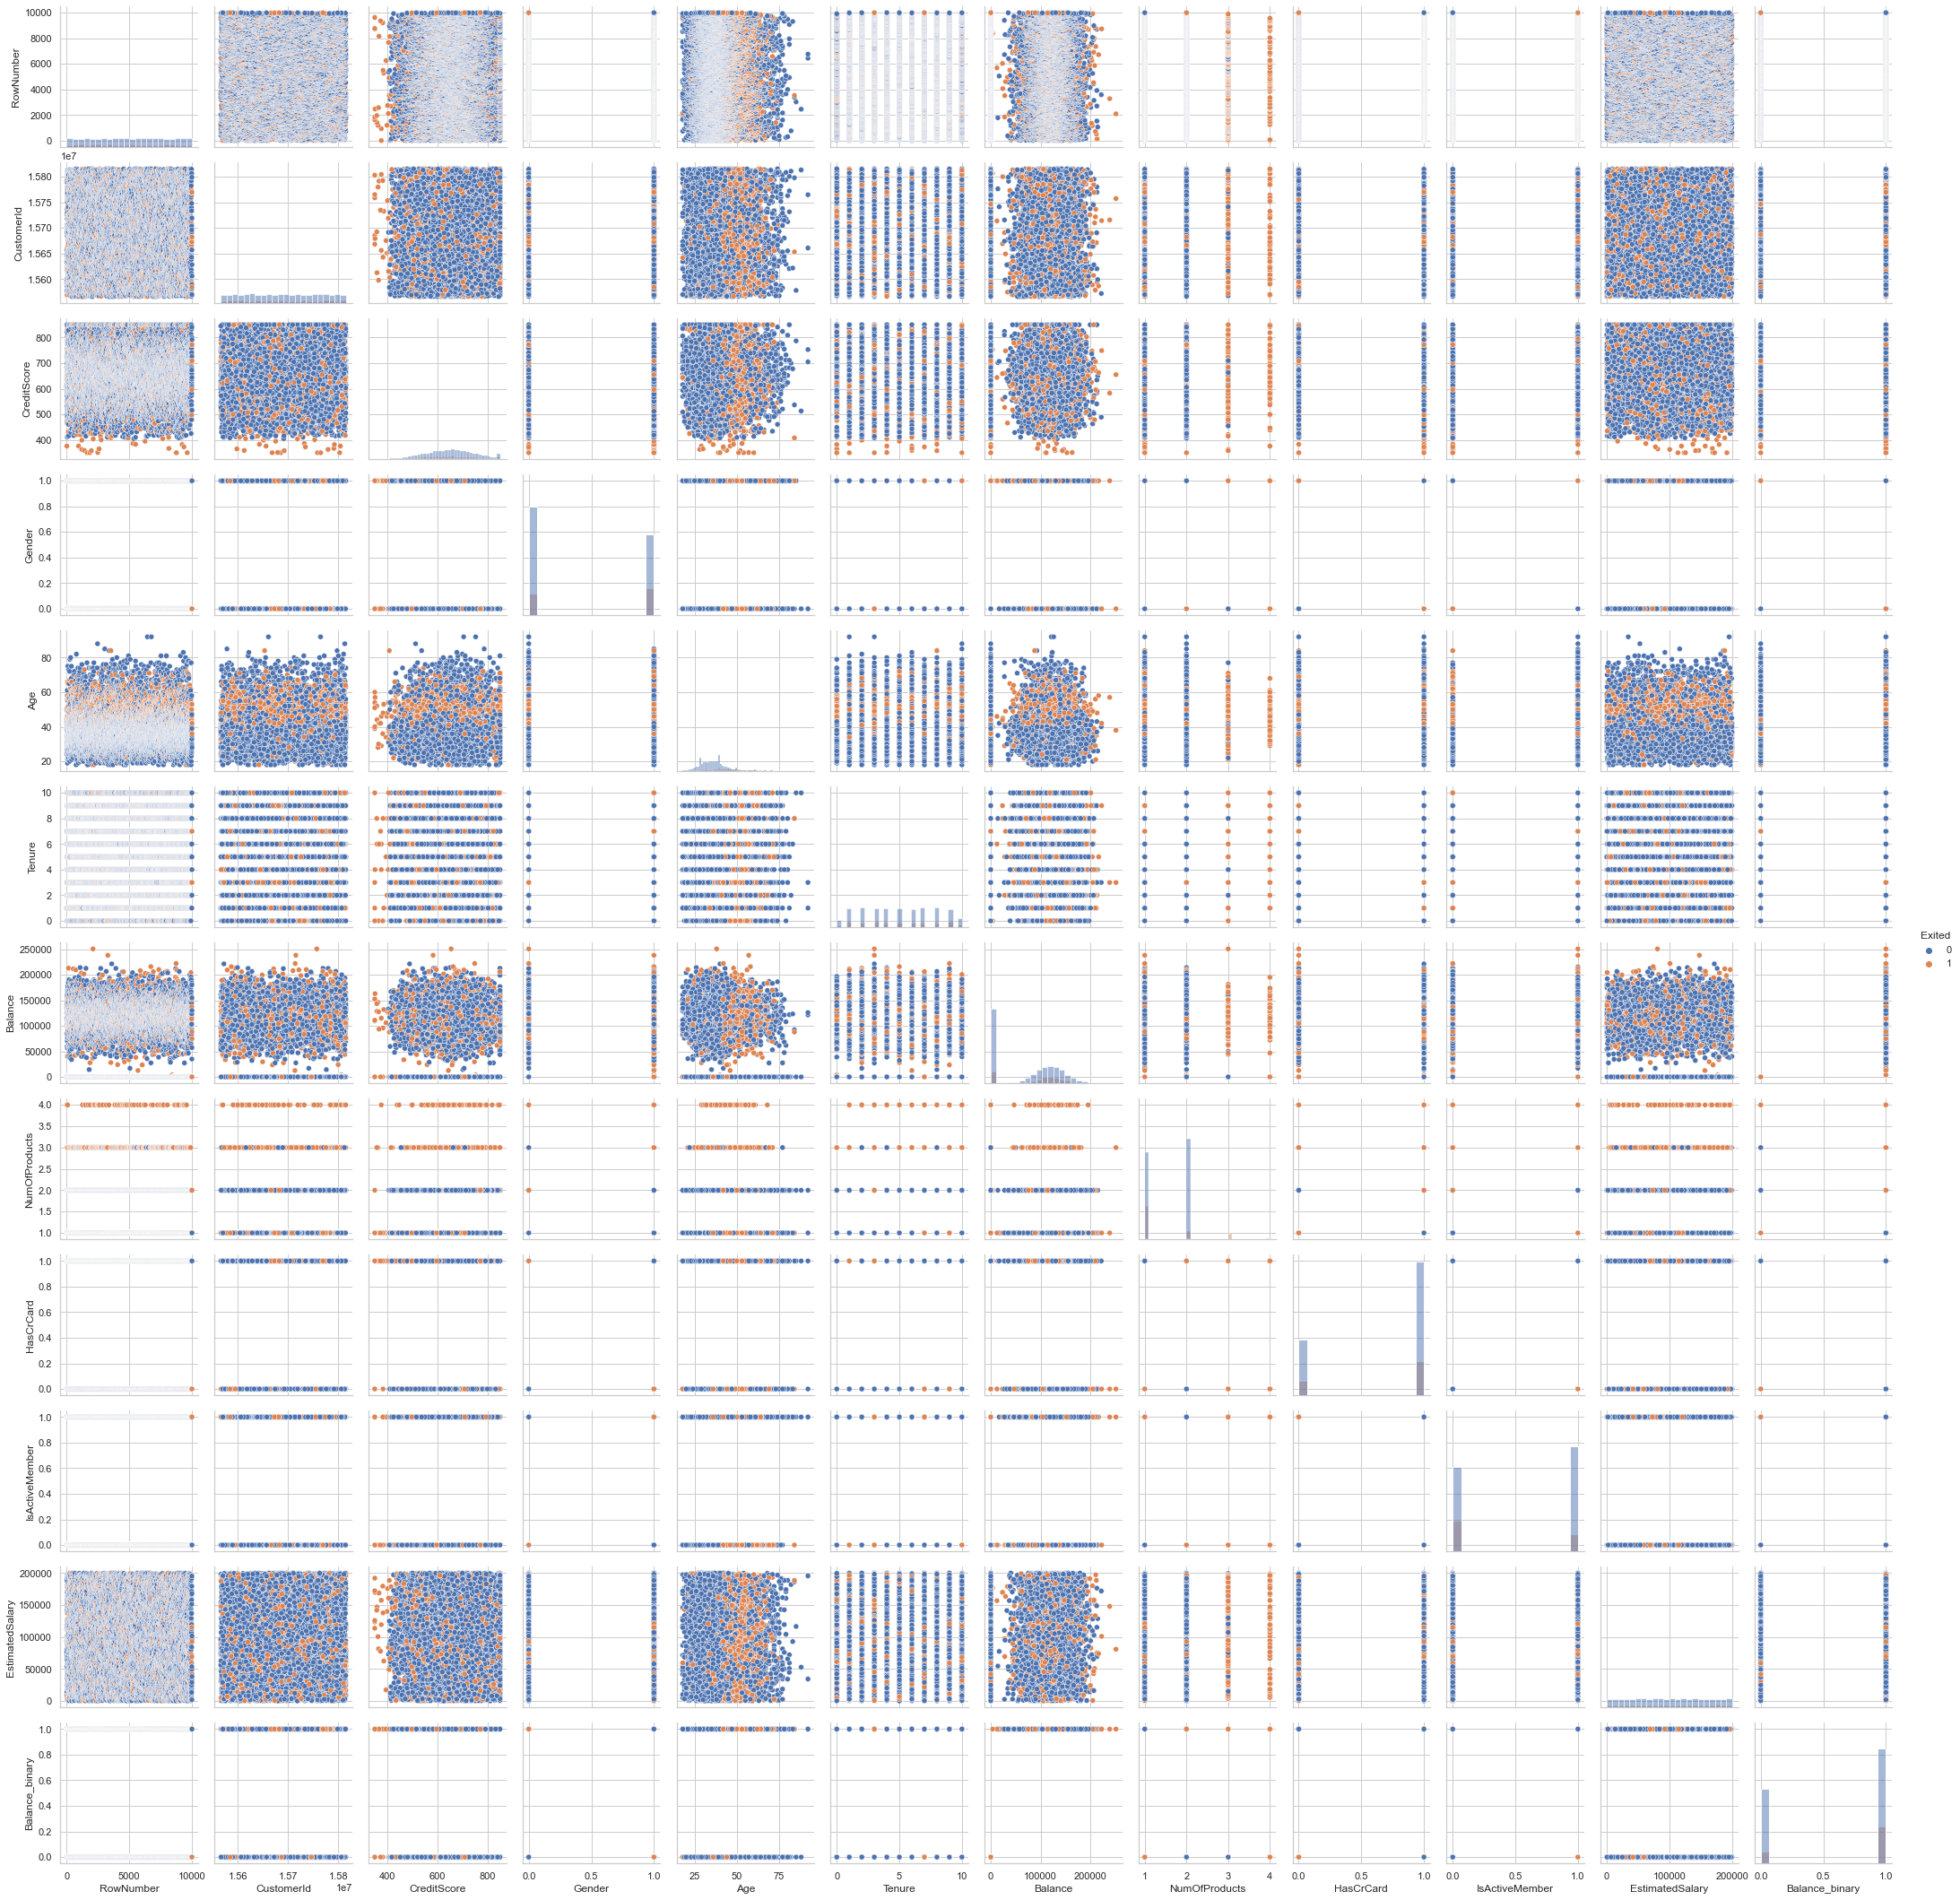

In [42]:
sns.pairplot(df, hue="Exited", diag_kind="hist")
plt.show()

#### Plotting Swarm and Box Plots

###### CreditScore

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 88.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 59.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


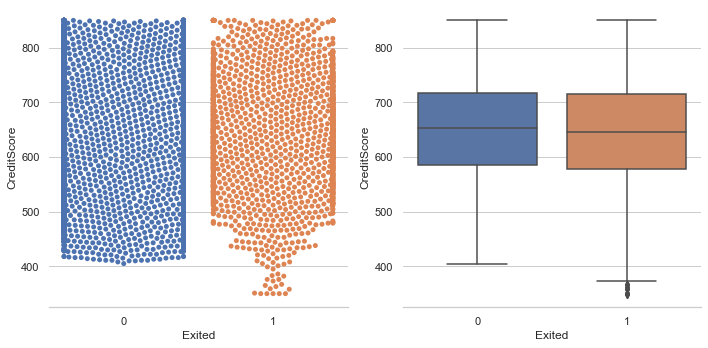

In [43]:
fig, axes = plt.subplots(ncols = 2, figsize=(10, 5), sharex=True)
sns.despine(left=True)

#Swarmplot
sns.swarmplot(x=df['Exited'], y=df['CreditScore'], ax=axes[0])

#Boxplot
sns.boxplot(x=df['Exited'], y=df['CreditScore'], ax=axes[1])

plt.tight_layout()

Conclusion: Berdasarkan plot yang telah dibuat, CreditScore menjadi fitur yang kurang menarik untuk digunakan dalam mengklasifikasikan churn pelanggan.

##### Geography

In [ ]:
fig, axes = plt.subplots(ncols = 2, figsize=(10, 5), sharex=True)
sns.despine(left=True)

# Plot the Swarmplot
sns.swarmplot(x=df['Exited'], y=df['Geography'], ax=axes[0])

# Plot the Boxplot
sns.boxplot(x=df['Exited'], y=df['Geography'], ax=axes[1])

plt.tight_layout()

###### Conclusion
Menurut plot yang telah dibuat, Geography menjadi fitur yang menarik untuk digunakan dalam mengklasifikasikan spesies yang berbeda. 

##### Gender

In [ ]:
fig, axes = plt.subplots(ncols = 2, figsize=(10, 5), sharex=True)
sns.despine(left=True)

# Plot the Swarmplot
sns.swarmplot(x=df['Exited'], y=df['Gender'], ax=axes[0])

# Plot the Boxplot
sns.boxplot(x=df['Exited'], y=df['Gender'], ax=axes[1])

plt.tight_layout()

##### Age

In [ ]:
fig, axes = plt.subplots(ncols = 2, figsize=(10, 5), sharex=True)
sns.despine(left=True)

# Plot the Swarmplot
sns.swarmplot(x=df['Exited'], y=df['Age'], ax=axes[0])

# Plot the Boxplot
sns.boxplot(x=df['Exited'], y=df['Age'], ax=axes[1])

plt.tight_layout()

##### Tenure

In [ ]:
fig, axes = plt.subplots(ncols = 2, figsize=(10, 5), sharex=True)
sns.despine(left=True)

# Plot the Swarmplot
sns.swarmplot(x=df['Exited'], y=df['Tenure'], ax=axes[0])

# Plot the Boxplot
sns.boxplot(x=df['Exited'], y=df['Tenure'], ax=axes[1])

plt.tight_layout()